In [2]:
import csv
import numpy as np
import pandas as pd
china = pd.read_csv('result333.csv',encoding='cp949' )
china
import matplotlib.pyplot as plt
import numpy as np
import os
if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")

In [3]:
china_=china.groupby(['읍면동명','업종'])["이용자수"].sum()
china_

읍면동명  업종   
건입동   문화/레져       3672
      소매        474982
      쇼핑       1121544
      숙박        398170
      식음료      2319554
                ...   
화북동   쇼핑        132773
      식음료         5603
효돈동   소매          2187
      쇼핑         10179
      식음료         8580
Name: 이용자수, Length: 190, dtype: int64

In [6]:
china_dataframe=china.sort_values(by='이용자수', ascending=False).groupby(['읍면동명','업종']).head()

In [7]:
foreign=china_dataframe.sort_values(by=['읍면동명','이용자수'], ascending=[True,False])

In [8]:
foreign

,읍면동명,업종,방문인구,이용자수,이용금액
4,건입동,식음료,894777.024,2319554,1.671060e+11
2,건입동,쇼핑,894777.024,1121544,4.769022e+10
1,건입동,소매,1489027.677,474982,9.419984e+10
3,건입동,숙박,894777.024,398170,1.155397e+11
0,건입동,문화/레져,410288.450,3672,2.236200e+08
...,...,...,...,...,...
186,화북동,식음료,29503.825,5603,3.236150e+08
184,화북동,소매,20578.718,1464,7.584000e+07
188,효돈동,쇼핑,34715.023,10179,1.857204e+08
189,효돈동,식음료,25517.742,8580,2.802216e+08


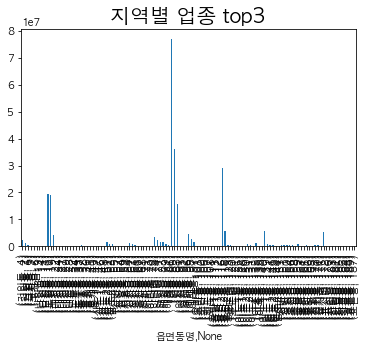

In [77]:
'''
#지역별로 뽑고 싶은데...
foreign_group.plot.bar(x='읍면동명', y='이용자수')
plt.title('지역별 업종 top3', fontsize='20')
plt.show()
'''

In [74]:
#상위 3개 추출
def get_top3(group, key, n=3):
    tops=group[key]
    return tops.nlargest(n)
grouppy=foreign.groupby('읍면동명')
foreign_group=grouppy.apply(get_top3,'이용자수')
foreign_group

읍면동명     
건입동   4      2319554
      2      1121544
      1       474982
구좌읍   9       265656
      7       119160
              ...   
화북동   186       5603
      184       1464
효돈동   188      10179
      189       8580
      187       2187
Name: 이용자수, Length: 119, dtype: int64

In [22]:

b=foreign.drop_duplicates(['읍면동명'])
b
b['읍면동명']
c=np.array(b['읍면동명'].tolist())
c

array(['건입동', '구좌읍', '남원읍', '노형동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍',
       '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동',
       '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동',
       '표선면', '한림읍', '화북동', '효돈동'], dtype='<U4')

In [27]:
grouped=china.groupby(['읍면동명','업종'])
china_group=grouped.first()
china_group
china_group = pd.read_csv('china_group.csv')
china_group

,읍면동명,업종,방문인구,이용자수,이용금액
0,건입동,문화/레져,410288.450,3672,2.236200e+08
1,건입동,소매,1489027.677,474982,9.419984e+10
2,건입동,쇼핑,894777.024,1121544,4.769022e+10
3,건입동,숙박,894777.024,398170,1.155397e+11
4,건입동,식음료,894777.024,2319554,1.671060e+11
...,...,...,...,...,...
185,화북동,쇼핑,71795.806,132773,3.069768e+09
186,화북동,식음료,29503.825,5603,3.236150e+08
187,효돈동,소매,8463.893,2187,2.932800e+07
188,효돈동,쇼핑,34715.023,10179,1.857204e+08


In [29]:
my_list=['건입동', '구좌읍', '남원읍', '노형동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍',
       '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동',
       '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동',
       '표선면', '한림읍', '화북동', '효돈동']
for con in range(len(my_list)):
    condition = (china_group.읍면동명 == my_list[con]) # 조건식 작성
    tt = (china_group[condition].sort_values(by='이용자수',ascending = False))
    print(tt.head())

  읍면동명     업종         방문인구     이용자수          이용금액
4  건입동    식음료   894777.024  2319554  1.671060e+11
2  건입동     쇼핑   894777.024  1121544  4.769022e+10
1  건입동     소매  1489027.677   474982  9.419984e+10
3  건입동     숙박   894777.024   398170  1.155397e+11
0  건입동  문화/레져   410288.450     3672  2.236200e+08
  읍면동명     업종        방문인구    이용자수          이용금액
9  구좌읍    식음료  486993.661  265656  9.971190e+09
7  구좌읍     쇼핑  486993.661  119160  3.448811e+09
6  구좌읍     소매  486993.661   48168  3.434054e+09
5  구좌읍  문화/레져  486993.661   41928  2.758987e+09
8  구좌읍     숙박  404621.979   33792  3.676618e+09
   읍면동명     업종         방문인구    이용자수          이용금액
13  남원읍     숙박  1804042.290  111216  1.146400e+13
14  남원읍    식음료  1905385.101   45528  3.953146e+09
11  남원읍     소매  1452152.137   42432  5.382240e+09
10  남원읍  문화/레져  1725539.074   40368  1.254207e+10
12  남원읍     쇼핑  1804042.290   17592  7.217290e+08
   읍면동명     업종         방문인구      이용자수          이용금액
16  노형동     소매  2845256.277  19258800  1.353201e+12
17  노형동 

  읍면동명     업종         방문인구     이용자수          이용금액
0  건입동  문화/레져   410288.450     3672  2.236200e+08
1  건입동     소매  1489027.677   474982  9.419984e+10
2  건입동     쇼핑   894777.024  1121544  4.769022e+10
3  건입동     숙박   894777.024   398170  1.155397e+11
4  건입동    식음료   894777.024  2319554  1.671060e+11


<AxesSubplot:xlabel='업종'>

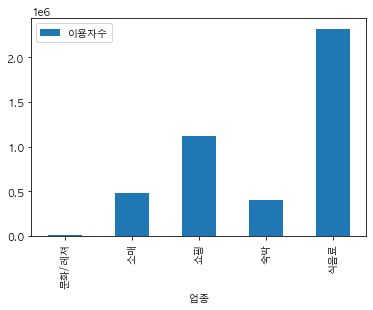

In [33]:
condition = (china_group.읍면동명 == "건입동") # 조건식 작성
chinese = china_group.sort_values(by=['업종','이용자수'],ascending=[True,False])
print(china_group[condition].head())
a=china_group[condition].head()
a
b=a["업종"]
c=a["이용자수"]
plot_a=pd.concat([b,c], axis=1)
plot_chinese=plot_a.set_index('업종')
plot_chinese
plot_chinese.plot(kind='bar')

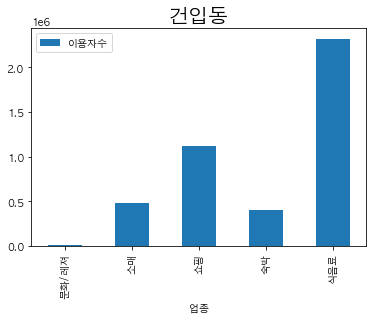

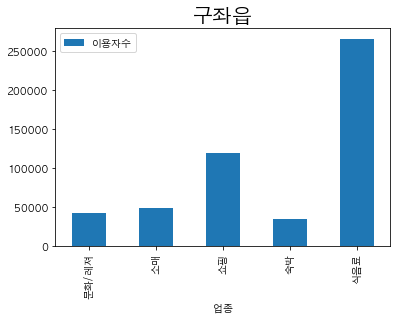

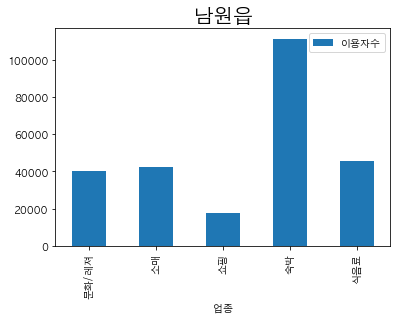

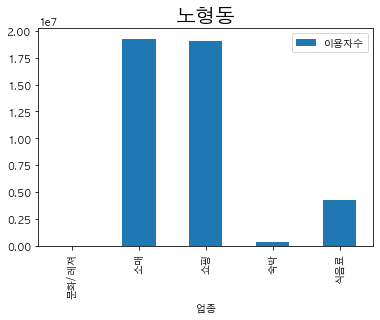

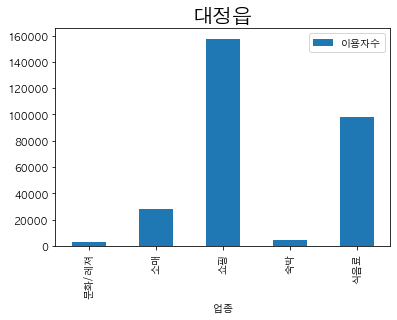

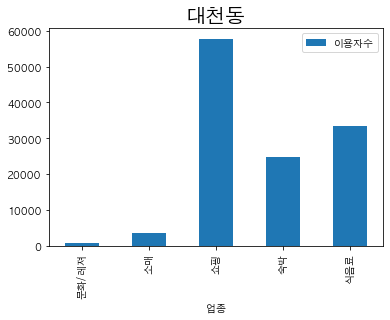

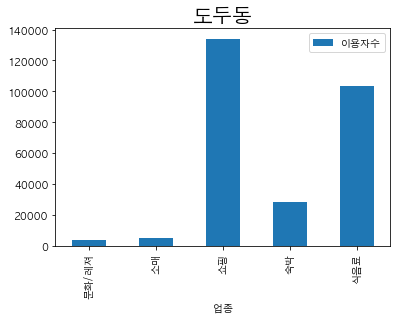

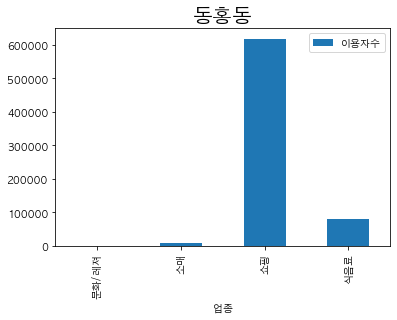

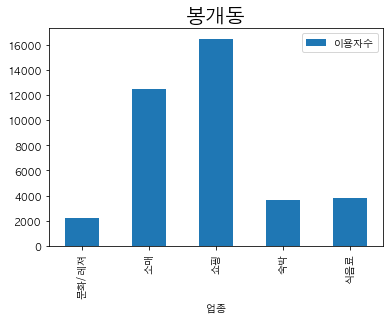

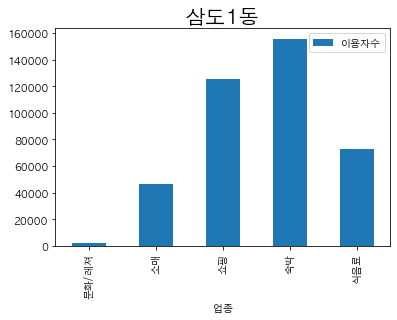

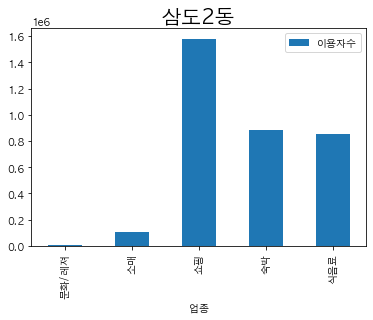

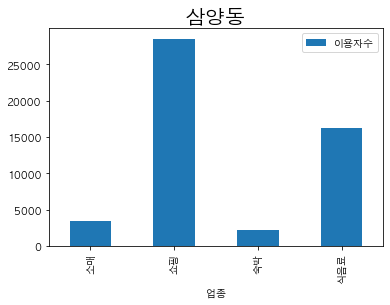

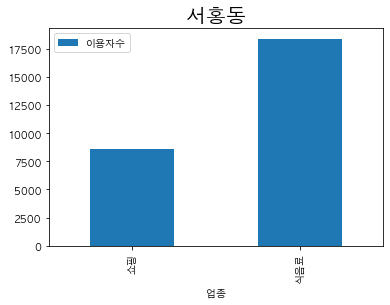

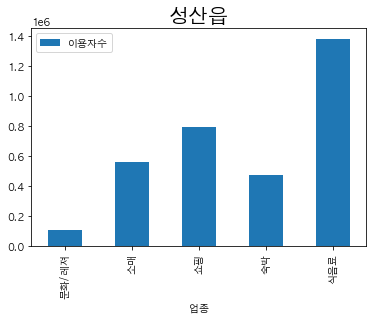

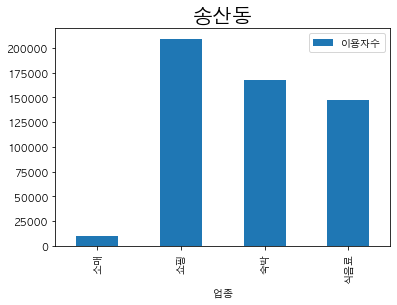

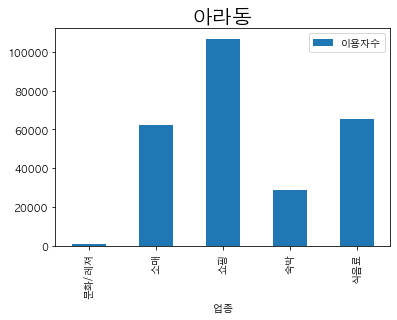

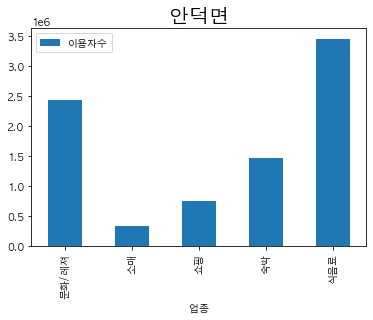

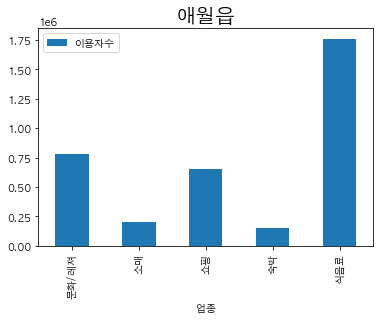

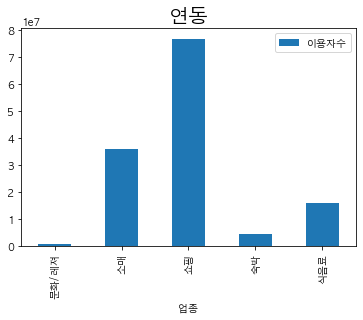

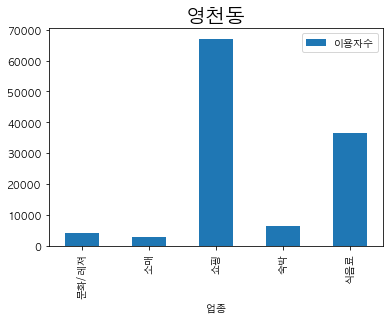

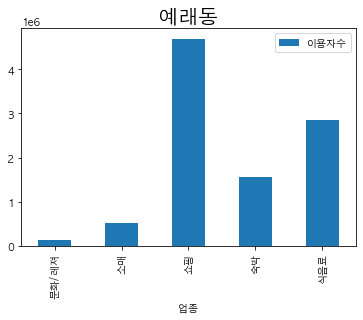

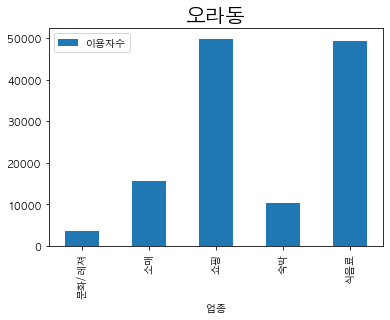

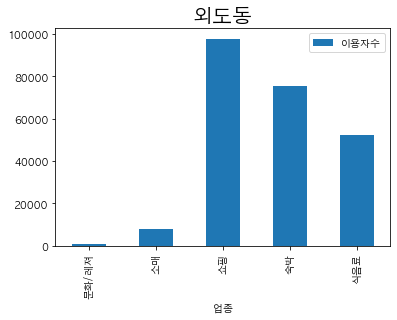

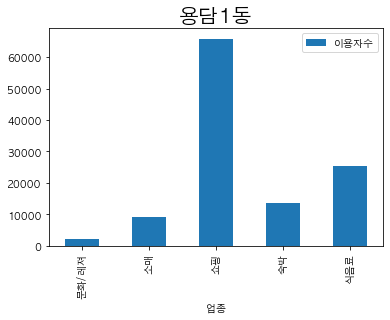

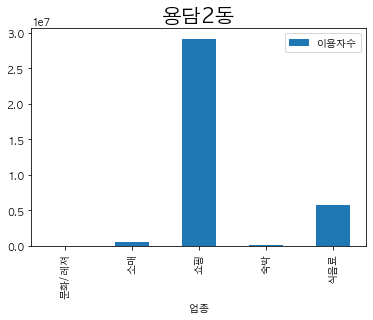

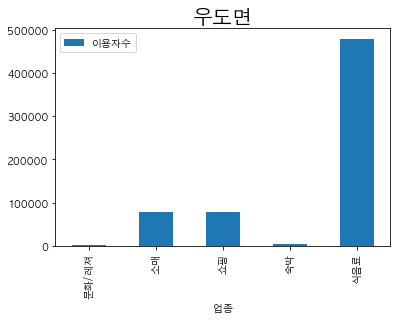

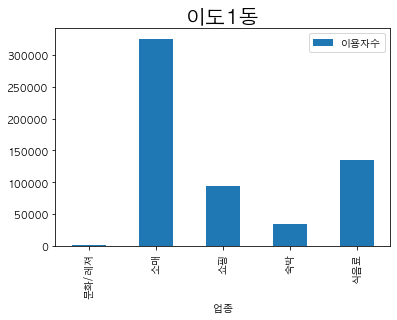

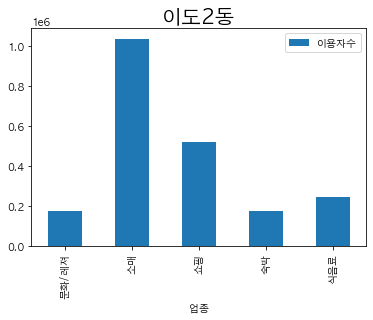

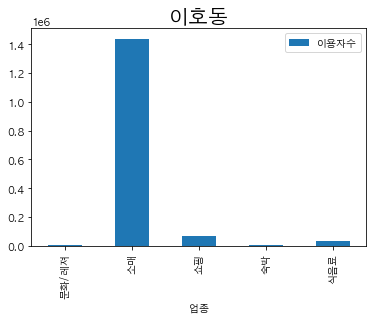

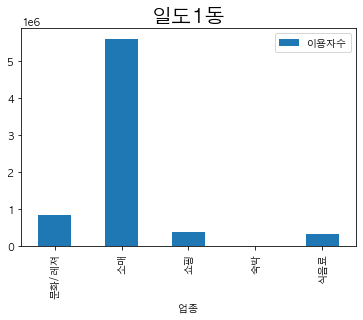

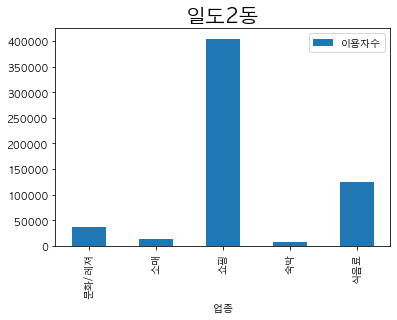

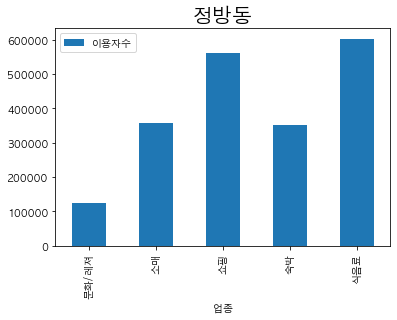

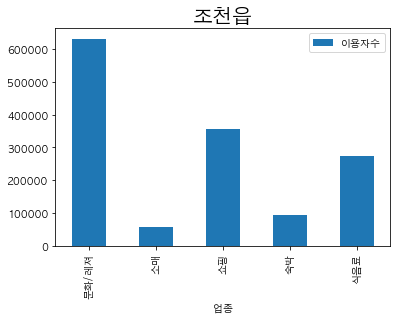

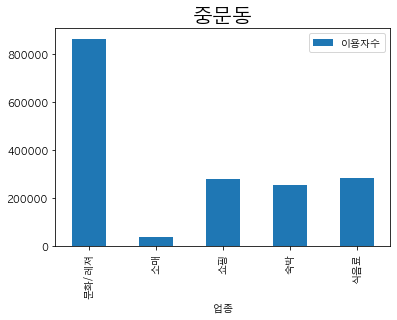

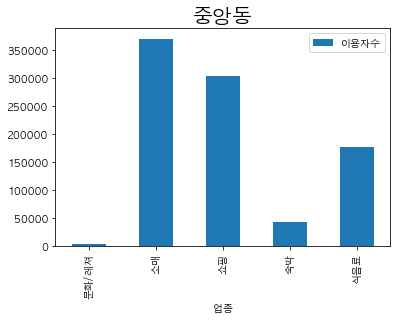

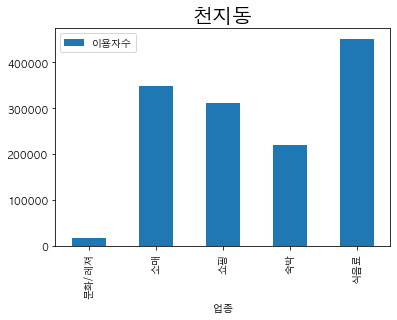

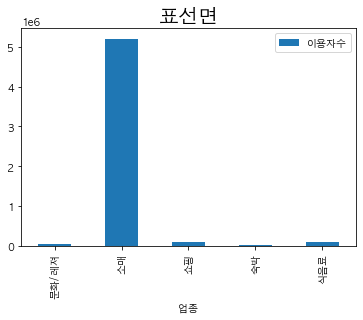

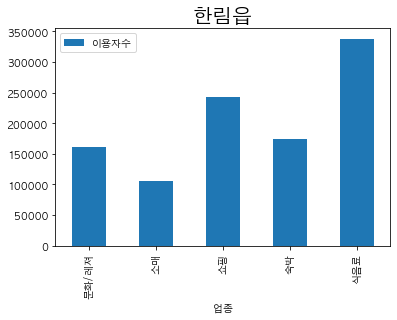

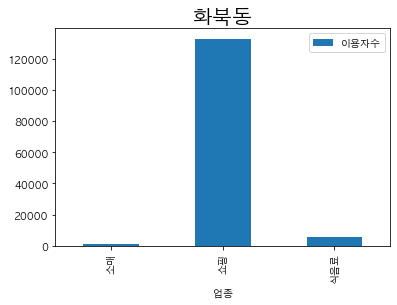

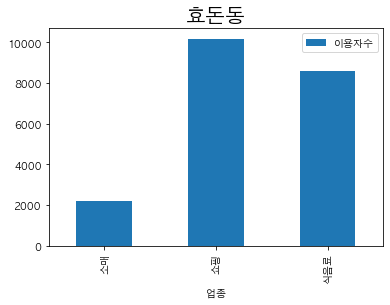

In [35]:
my_list=['건입동', '구좌읍', '남원읍', '노형동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍',
       '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동',
       '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동', '천지동',
       '표선면', '한림읍', '화북동', '효돈동']
for i in range(len(my_list)):
    condition = (china_group.읍면동명 == my_list[i])
    chinese = china_group.sort_values(by=['업종','이용자수'],ascending=[True,False])
    a=china_group[condition].head()
    b=a["업종"]
    c=a["이용자수"]
    plot_a=pd.concat([b,c], axis=1)
    plot_chinese=plot_a.set_index('업종')
    plot_chinese
    plot_chinese.plot(kind='bar')
    plt.title(my_list[i], fontsize='20')